Sveučilište u Zagrebu<br>
Fakultet elektrotehnike i računarstva

## Strojno učenje 2016./2017.

<a href="http://www.fer.unizg.hr/predmet/su">http://www.fer.unizg.hr/predmet/su</a>

### Laboratorijska vježba 3: Stroj potpornih vektora i algoritam k-najbližih susjeda

(c) 2015-2016 Jan Šnajder, Domagoj Alagić

<i>Verzija: 0.2</i> <br/>
<i>Zadnji put ažurirano: 9. studenog 2016.</i> 

Objavljeno: **9. studenog 2016.**<br>
Rok za predaju: U terminu vježbe u tjednu od **14. studenog 2016.**

### Upute

Treća laboratorijska vježba sastoji se od sedam zadataka. Kako bi kvalitetnije, ali i na manje zamoran način usvojili gradivo ovog kolegija, potrudili smo se uključiti tri vrste zadataka: **1)** implementacija manjih algoritama, modela ili postupaka; **2)** eksperimenti s raznim modelima te njihovim hiperparametrima, te **3)** primjena modela na (stvarnim) podatcima. Ovim zadatcima pokrivamo dvije paradigme učenja: učenje izgradnjom (engl. *learning by building*) i učenje eksperimentiranjem (engl. *learning by experimenting*).

U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import mlutils
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
def plot_svc_with_margine(X, y, svc):

    def margine(x):
        dec = svc.decision_function(x)
        for i,d in enumerate(dec):
            if d < -1: dec[i] = 0.25
            elif d < 0: dec[i] = 0.5
            elif d < 1: dec[i] = 0.75
            else: dec[i] = 1
        return dec
    
    def dec_fun(x):
        dec = svc.decision_function(x)
        for i,d in enumerate(dec):
            if d < 0: dec[i] = 0
            else: dec[i] = 1
        return dec
    
    r = 0.03  # mesh resolution
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                         np.arange(y_min, y_max, r))
    XX=np.c_[xx.ravel(), yy.ravel()]
    dec = dec_fun(XX)
    Z = margine(XX)
    # Put the result into a color plot
    dec = dec.reshape(xx.shape)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.bone)
    plt.contour(xx, yy, dec, levels = [0.5], linewidths=2)
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.Paired, marker='o', s=50)

### 1. Klasifikator SVM

#### (a)

Upoznajte se s klasom [`svm.SVC`](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC), koja ustvari implementira sučelje prema implementaciji [`libsvm`](http://www.csie.ntu.edu.tw/~cjlin/libsvm/). Primijenite model `SVC` s linearnom jezgrenom funkcijom (tj. bez preslikavanja primjera u prostor značajki) na skup podataka `seven` (dan niže) s $N=7$ primjera. Ispišite koeficijente $w_0$ i $\mathbf{w}$. Ispišite dualne koeficijente i potporne vektore. Završno, koristeći funkciju `mlutils.plot_2d_svc_problem` iscrtajte podatke, decizijsku granicu i marginu. Funkcija prima podatke, oznake i klasifikator (objekt klase `SVC`). Izračunajte širinu margine.

w0 =  [ 3.99951172]
w =  [[ -9.99707031e-01  -2.92968750e-04]]
Sirina margine =  2.00058602331
Dualni koeficijenti =  [[ -4.99707031e-01  -1.46484375e-04   4.99853516e-01]]
Potporni vektori = 
[[ 5.  2.]
 [ 5.  4.]
 [ 3.  2.]]


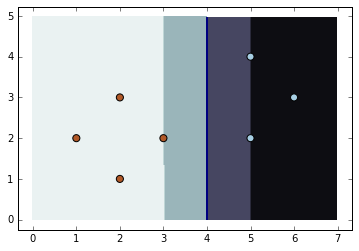

In [144]:
from sklearn.svm import SVC

seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, -1, -1, -1])

# Vaš kôd ovdje...
model = SVC(kernel='linear')
model.fit(seven_X, seven_y)
plot_svc_with_margine(seven_X, seven_y, model)
print'w0 = ', model.intercept_
print'w = ', model.coef_
print'Sirina margine = ', 2*1/sp.linalg.norm(model.coef_)
print'Dualni koeficijenti = ', model.dual_coef_
print'Potporni vektori = \n', model.support_vectors_

**Q:** Koliko iznosi širina margine? <br>
**Q:** Koji primjeri su potporni vektori i zašto?

#### (b)

Definirajte funkciju `hinge(model, x, y)` koja izračunava gubitak zglobnice modela SVM (s linearnom jezgrom) na primjeru `x`. Izračunajte gubitke modela naučenog na skupu `seven` za primjere $\mathbf{x}^{(2)}=(3,2)$ i $\mathbf{x}^{(1)}=(3.5,2)$ koji su označeni pozitivno ($y=1$) te za $\mathbf{x}^{(3)}=(4,2)$ koji je označen negativno ($y=-1$). Također, izračunajte prosječni gubitak SVM-a na skupu `seven`. Uvjerite se da je rezultat identičan onome koji biste dobili primjenom ugrađene funkcije [`metrics.hinge_loss`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.hinge_loss.html).

In [61]:
from sklearn.metrics import hinge_loss

# Vaš kôd ovdje...
def hinge(model,x,y):
    if len(x.shape) == 1:
        return max(0, 1 - y * model.decision_function([x]))
    return max(0, 1 - y * model.decision_function(x))

model = SVC(kernel='linear', probability=True)
model.fit(seven_X, seven_y)
X_temp = np.array([[3,2], [3.5,2], [4,2]])
y_temp = np.array([1,1,-1])
for i,x in enumerate(X_temp):
    print x ,'gubitak zglobnice ',round(hinge(model,X_temp[i],y_temp[i]),3)
    
y_temp = [y if y==1 else -1 for y in seven_y]
print 'Moja izracunata: ', average([(hinge(model,x,y)) for x,y in zip(seven_X, y_temp)]) 
print 'hinge_loss: ', hinge_loss(y_temp, model.decision_function(seven_X)) 

[ 3.  2.] gubitak zglobnice  0.0
[ 3.5  2. ] gubitak zglobnice  0.5
[ 4.  2.] gubitak zglobnice  1.0
Moja izracunata:  8.37053571429e-05
hinge_loss:  8.37053571429e-05


#### (c)

Vratit ćemo se na skupove podataka `outlier` ($N=8$) i `unsep` ($N=8$) iz prošle laboratorijske vježbe (dani niže) i pogledati kako se model SVM-a nosi s njima. Naučite ugrađeni model SVM-a (s linearnom jezgrom) na ovim podatcima i iscrtajte decizijsku granicu (skupa s marginom). Također ispišite točnost modela korištenjem funkcije [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html).

In [26]:
from sklearn.metrics import accuracy_score

outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, -1)

unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, -1)

Kazna za [3,2] 0.666
Kazna za [2,2] 2.0
Potporni vektori = 
[[ 5.  2.]
 [ 5.  4.]
 [ 2.  2.]
 [ 2.  3.]
 [ 3.  2.]]


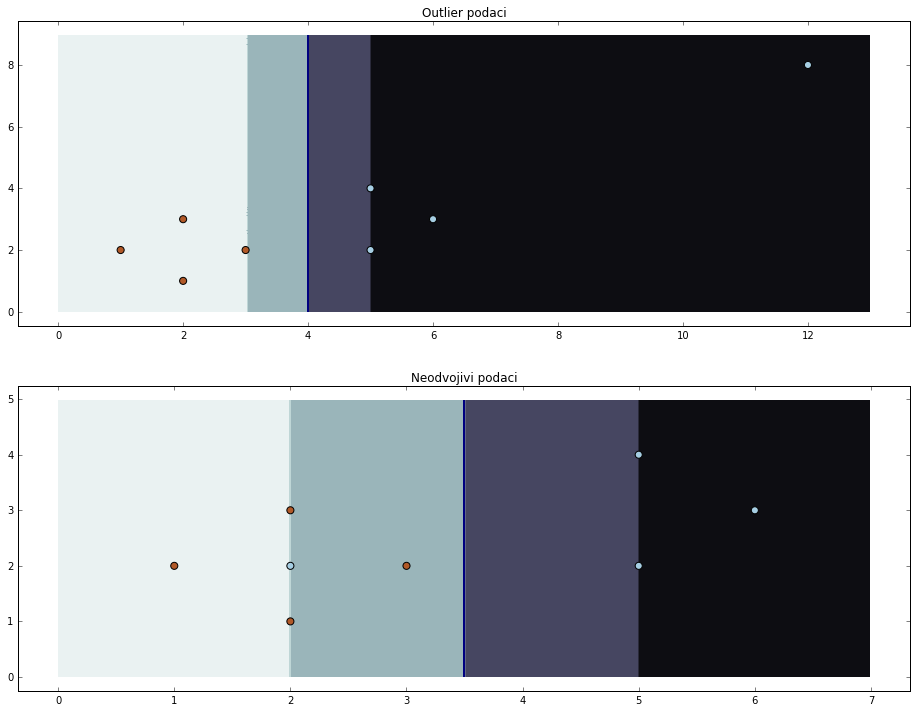

In [62]:
# Vaš kôd ovdje...
plt.figure(figsize=(16,12))
model = SVC(kernel='linear')
model.fit(outlier_X, outlier_y)
plt.subplot(2,1,1)
plt.title("Outlier podaci")
plot_svc_with_margine(outlier_X, outlier_y, model)

model = SVC(kernel='linear')
model.fit(unsep_X, unsep_y)
plt.subplot(2,1,2)
plt.title("Neodvojivi podaci")
plot_svc_with_margine(unsep_X, unsep_y, model)

print "Kazna za [3,2]", round(hinge(model,np.array([3,2]),np.array([1])),3)
print "Kazna za [2,2]", round(hinge(model,np.array([2,2]),np.array([-1])),3)

print'Potporni vektori = \n', model.support_vectors_

**Q:** Zašto stršeća vrijednost ne utječe na SVM? <br>
**Q:** Kako se linearan SVM nosi s linearno neodvojivim skupom podataka? <br>
**Q:** Zašto SVM ipak uspjeva pronaći nekakvu granicu kod linearno neodvojivog problema, iako koristimo linearnu jezgru?

### 2. Nelinearan SVM

Ovaj zadatak pokazat će kako odabir jezgre utječe na kapacitet SVM-a. Na skupu `unsep` iz prošlog zadatka trenirajte tri modela SVM s različitim jezgrenim funkcijama: linearnom, polinomijalnom i radijalnom baznom (RBF) funkcijom. Varirajte parametar $C$ po vrijednostima $C\in\{10^{-2},1,10^2\}$, dok za ostale parametre (stupanj polinoma za polinomijalnu jezgru odnosno parametar $\gamma$ za jezgru RBF) koristite podrazumijevane vijednosti. Prikažite granice između klasa (i margine) na grafikonu organiziranome u polje $3x3$, gdje su stupci različite jezgre, a retci različite vrijednosti parametra $C$.

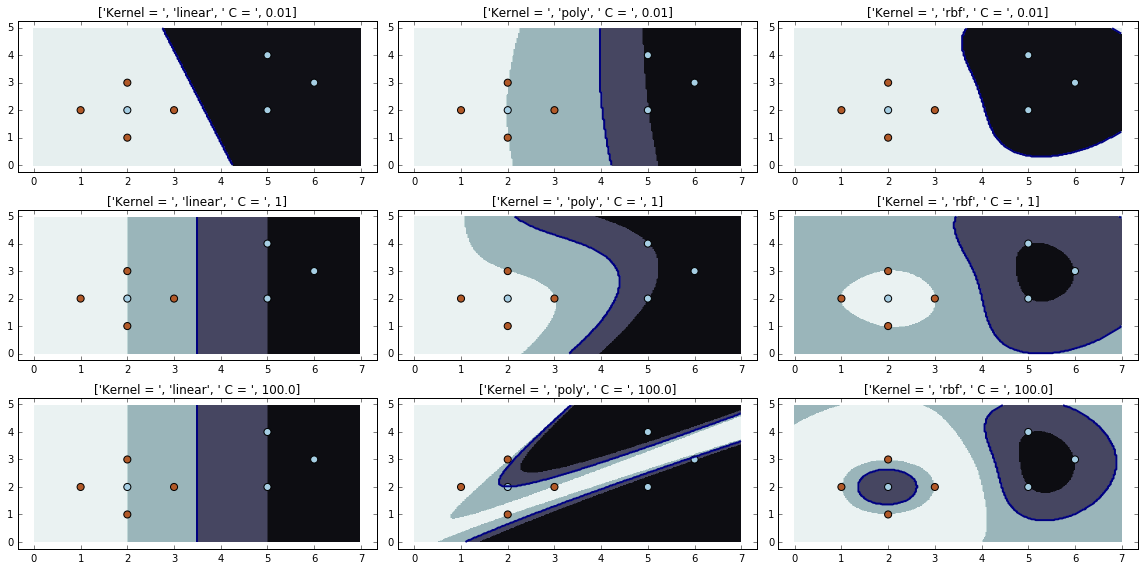

In [147]:
# Vaš kôd ovdje...
plt.figure(figsize=(16,8))
kernels = ['linear', 'poly', 'rbf']
Cs = [1e-2, 1, 1e2]
i = 1
for C in Cs:
    for kernel in kernels:   
        subplot(3,3,i)
        i += 1
        model = SVC(kernel=kernel, C=C)
        model.fit(unsep_X, unsep_y)
        plot_svc_with_margine(unsep_X, unsep_y, model)
        plt.title(['Kernel = ',kernel,' C = ', C])
plt.tight_layout()

In [70]:
# def temp(X, y, svc):

#     def margine(x):
#         dec = svc.decision_function(x)
#         for i,d in enumerate(dec):
#             if d < -1: dec[i] = 0.25
#             elif d < 0: dec[i] = 0.5
#             elif d < 1: dec[i] = 0.75
#             else: dec[i] = 1
#         return dec
    
#     def dec_fun(x):
#         dec = svc.decision_function(x)
#         for i,d in enumerate(dec):
#             if d < 0: dec[i] = 0
#             else: dec[i] = 1
#         return dec
    
#     r = 0.03  # mesh resolution
#     x_min, x_max = X[:, 0].min() - 20, X[:, 0].max() + 20
#     y_min, y_max = X[:, 1].min() - 20, X[:, 1].max() + 20
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
#                          np.arange(y_min, y_max, r))
#     XX=np.c_[xx.ravel(), yy.ravel()]
#     dec = dec_fun(XX)
#     Z = margine(XX)
#     # Put the result into a color plot
#     dec = dec.reshape(xx.shape)
#     Z = Z.reshape(xx.shape)
#     plt.contourf(xx, yy, Z, cmap=plt.cm.bone)
#     plt.contour(xx, yy, dec, levels = [0.5], linewidths=2)
#     plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.Paired, marker='o', s=50)
    
# model = SVC(kernel='linear', C=0.01)
# model.fit(unsep_X, unsep_y)
# temp(unsep_X, unsep_y, model)

# for i,x in enumerate(unsep_X):
#     print x ,'gubitak zglobnice ',round(hinge(model,unsep_X[i],unsep_y[i]),3)

    
# print'w = ', model.coef_

### 3. Optimizacija hiperparametara SVM-a

Pored hiperparametra $C$, model SVM s jezgrenom funkcijom RBF ima i dodatni hiperparametar $\gamma=\frac{1}{2\sigma^2}$ (preciznost). Taj parametar također određuje složenost modela: velika vrijednost za $\gamma$ znači da će RBF biti uska, primjeri će biti preslikani u prostor u kojem su (prema skalarnome produktu) međusobno vrlo različiti, što će rezultirati složenijim modelima. Obrnuto, mala vrijednost za $\gamma$ znači da će RBF biti široka, primjeri će biti međusobno sličniji, što će rezultirati jednostavnijim modelima. To ujedno znači da, ako odabremo veći $\gamma$, trebamo jače regularizirati model, tj. trebamo odabrati manji $C$, kako bismo spriječili prenaučenost. Zbog toga je potrebno zajednički optimirati hiperparametre $C$ i $\gamma$, što se tipično radi iscrpnim pretraživanjem po rešetci (engl. *grid search*). Ovakav pristup primjenjuje se kod svih modela koji sadrže više od jednog hiperparametra.


#### (a)

Definirajte funkciju 

> `grid_search(X_train, X_validate, y_train, y_validate, (c1,c2), (g1,g2), error_surface=False)` 

koja optimizira parametre $C$ i $\gamma$ pretraživanjem po rešetci. Funkcija treba pretražiti parametre $C\in\{2^{c_1},2^{c_1+1},\dots,2^{c_2}\}$ i $\gamma\in\{2^{g_1},2^{g_1+1},\dots,2^{g_2}\}$. Funkcija treba vratiti optimalne parametre $(C^*,\gamma^*)$, tj. one za koje na skupu za provjeru model ostvaruju najmanju pogrešku. Dodatno, ako je `surface=True`, funkcija treba vratiti matrice (tipa `ndarray`) pogreške modela (očekivanje gubitka 0-1) na skupu za učenje i skupu za provjeru. Svaka je matrica dimenzija $(c_2-c_1+1)\times(g_2-g_1+1)$ (retci odgovaraju različitim vrijednostima za $C$, a stupci različitim vrijednostima za $\gamma$).

In [16]:
from sklearn.metrics import accuracy_score, zero_one_loss

def grid_search(X_train, X_validate, y_train, y_validate, (c1,c2), (g1,g2), error_surface=False) :
    # Vaš kôd ovdje...
    train_error = zeros([c2-c1+1, g2-g1+1])
    test_err = zeros([c2-c1+1, g2-g1+1])
    C_range = list(range(c1, c2+1))
    gamma_range = list(range(g1, g2+1))
    
    C_opt = 0
    gama_opt = 0
    acc_max = -1
    for i,C_current in enumerate(C_range):
        for j,gamma_current in enumerate(gamma_range):
            model = SVC(C=2**(C_current), gamma= 2**(gamma_current), kernel = 'rbf', probability=True)
            model.fit(X_train,y_train) 
            train_error[i][j] = zero_one_loss(y_train, model.predict(X_train))
            test_err[i][j] = zero_one_loss(y_validate, model.predict(X_validate))
            acc = accuracy_score(y_validate,model.predict(X_validate))
            if acc_max < acc:
                acc_max = acc
                C_opt = C_current
                gama_opt = gamma_current
    if error_surface: 
        return 2**(C_opt), 2**(gama_opt), np.array(train_error), np.array(test_err)
    else: 
        return 2**(C_opt), 2**(gama_opt)
    pass

#### (b)

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte **dva** skupa podataka od $N=200$ primjera: jedan s $n=2$ dimenzije i drugi s $n=1000$ dimenzija. Primjeri neka dolaze iz dviju klasa, s time da svakoj klasi odgovaraju dvije grupe (`n_clusters_per_class=2`), kako bi problem bio nešto složeniji, tj. nelinearniji. Neka sve značajke budu informativne. Podijelite skup primjera na skup za učenje i skup za ispitivanje u omjeru 1:1.

Na oba skupa optimirajte SVM s jezgrenom funkcijom RBF, u rešetci $C\in\{2^{-5},2^{-4},\dots,2^{15}\}$ i $\gamma\in\{2^{-15},2^{-14},\dots,2^{3}\}$. Prikažite površinu pogreške modela na skupu za učenje i skupu za provjeru, i to na oba skupa podataka (ukupno četiri grafikona) te ispišite optimalne kombinacije hiperparametara. Prikažite i granicu između klasa za dvodimenzijski skup. Za prikaz površine pogreške modela možete koristiti funkciju `plot_error_surface` iz paketa `mlutils`.

In [6]:
from sklearn.datasets import make_classification 
from sklearn.cross_validation import train_test_split 

In [127]:
X_2, y_2 = make_classification(n_samples=200, n_features=2, n_redundant=0, n_classes=2, n_clusters_per_class=2)#, random_state=42)
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.5, random_state=42)#, stratify= y_2)

X_1000, y_1000 = make_classification(n_samples=200, n_features=1000, n_redundant=0, n_classes=2, n_clusters_per_class=2)#, random_state=42)
X_1000_train, X_1000_test, y_1000_train, y_1000_test = train_test_split(X_1000, y_1000, test_size=0.5, random_state=42)# stratify= y_1000)

In [130]:
# trening of the model
C_opt1, gamma_opt1, err_train1, err_test1 = grid_search(X_2_train,X_2_test,y_2_train,y_2_test,(-5,15),(-15,3),error_surface=True)
C_opt2, gamma_opt2, err_train2, err_test2 = grid_search(X_1000_train,X_1000_test,y_1000_train,y_1000_test,(-5,15),(-15,3),error_surface=True)

Optimalni parametar za prvi se primjera C= 128, gamma = 2
Log vrijednosti log(C) = 7.0, log(gamma) = 1.0

Optimalni parametar za drugi set primjera C= 2, gamma = 0.00048828125
Log vrijednosti log(C) = 1.0, log(gamma) = -11.0



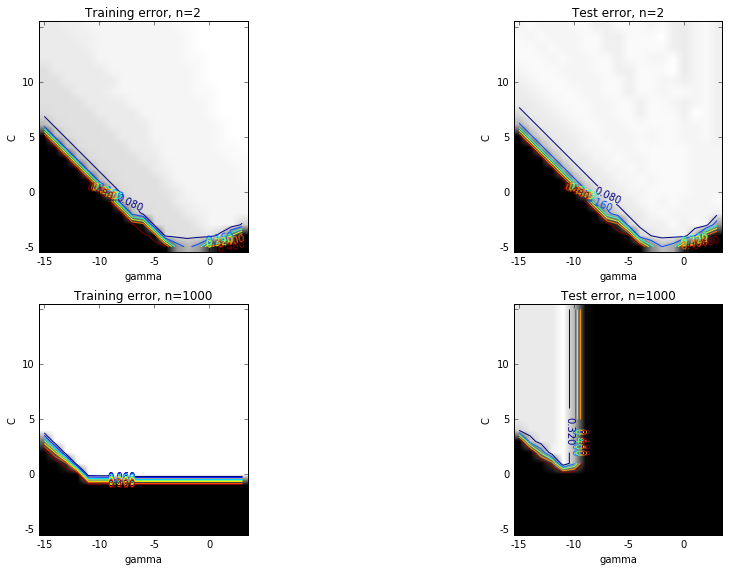

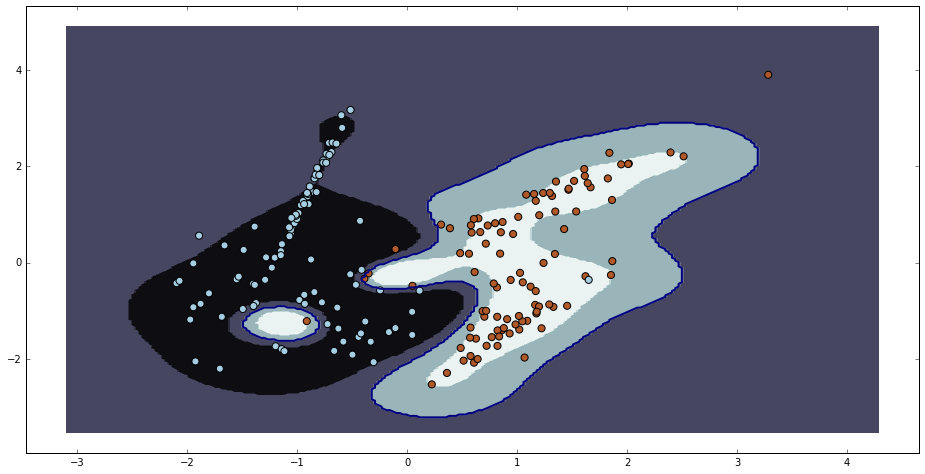

In [150]:
# Vaš kôd ovdje...
plt.figure(figsize=(16,8)) 

subplot(2,2,1)
mlutils.plot_error_surface(err_train1,(-5,15),(-15,3))
plt.title('Training error, n=2')
subplot(2,2,2)
mlutils.plot_error_surface(err_test1,(-5,15),(-15,3))
plt.title('Test error, n=2')
print 'Optimalni parametar za prvi se primjera C= %s, gamma = %s'% (C_opt1, gamma_opt1)
print 'Log vrijednosti log(C) = %s, log(gamma) = %s' % (log2(C_opt1), log2(gamma_opt1))
print

subplot(2,2,3)
mlutils.plot_error_surface(err_train2,(-5,15),(-15,3))
plt.title('Training error, n=1000')
subplot(2,2,4)
mlutils.plot_error_surface(err_test2,(-5,15),(-15,3))
plt.title('Test error, n=1000')
print 'Optimalni parametar za drugi set primjera C= %s, gamma = %s'% (C_opt2, gamma_opt2)
print 'Log vrijednosti log(C) = %s, log(gamma) = %s' % (log2(C_opt2), log2(gamma_opt2))
print  

plt.tight_layout()

plt.figure(figsize=(16,8))
model = SVC(kernel = 'rbf', C= C_opt1,gamma = gamma_opt1)
model.fit(X_2_train,y_2_train)
plot_svc_with_margine(X_2,y_2,model)

**Q:** Razlikuje li se površina pogreške na skupu za učenje i skupu za ispitivanje? Zašto? <br>
**Q:** U prikazu površine pogreške, koji dio površine odgovara prenaučenosti, a koji podnaučenosti? Zašto? <br>
**Q:** Kako broj dimenzija $n$ utječe na površinu pogreške, odnosno na optimalne hiperparametre $(C^*, \gamma^*)$? <br>
**Q:** Preporuka je da povećanje vrijednosti za $\gamma$ treba biti popraćeno smanjenjem vrijednosti za $C$. Govore li vaši rezultati u prilog toj preporuci? Obrazložite. <br>
**Q:** Podrazumijevana vrijednost parametara je $C=1$ i $\gamma=1/n$. Bi li te vrijednosti bile optimalne u ovom slučaju?

### 4. Utjecaj standardizacije značajki kod SVM-a

Za mnoge je modele bitno prije treniranja skalirati značajke, kako bi se spriječilo da značajke s većim numeričkim rasponima dominiraju nad onima s manjim numeričkim rasponima. To vrijedi i za SVM, kod kojega skaliranje nerijetko može znatno poboljšati rezultate. Svrha ovog zadataka jest eksperimentalno utvrditi utjecaj skaliranja značajki na točnost SVM-a.

Generirat ćemo dvoklasni skup od $N=500$ primjera s $n=2$ značajke, tako da je dimenzija $x_1$ većeg iznosa i većeg raspona od dimenzije $x_0$, te ćemo dodati jedan primjer koji vrijednošću značajke $x_1$ odskače od ostalih primjera:

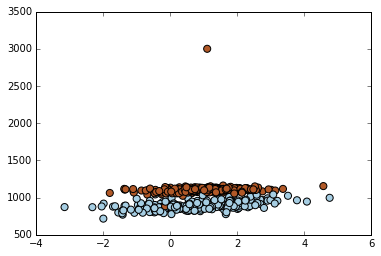

In [154]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=500,n_features=2,n_classes=2,n_redundant=0,n_clusters_per_class=1)
X[:,1] = X[:,1]*100+1000
X[0,1] = 3000

mlutils.plot_2d_svc_problem(X, y)

#### (a)

Proučite funkciju za iscrtavanje histograma [`hist`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist). Prikažite histograme vrijednosti značajki $x_0$ i $x_1$ (ovdje i u sljedećim zadatcima koristite `bins=50`).

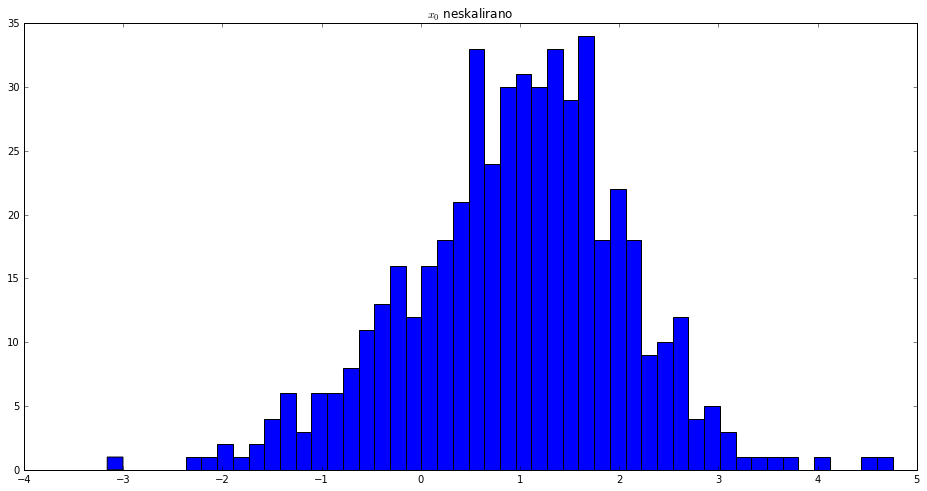

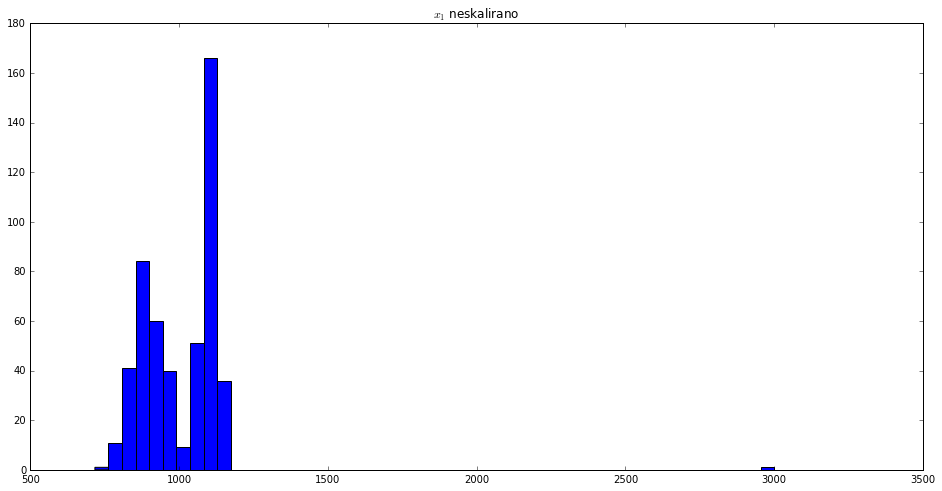

In [155]:
# Vaš kôd ovdje...
plt.figure(figsize=(16,8)) 
hist(X[:,0],bins=50)
plt.title('$x_0$ neskalirano')


plt.figure(figsize=(16,8))
hist(X[:,1],bins=50)
plt.title('$x_1$ neskalirano')

#### (b)

Proučite razred [`preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html). Prikažite histograme vrijednosti značajki $x_0$ i $x_1$ ako su iste skalirane min-max skaliranjem (ukupno dva histograma).

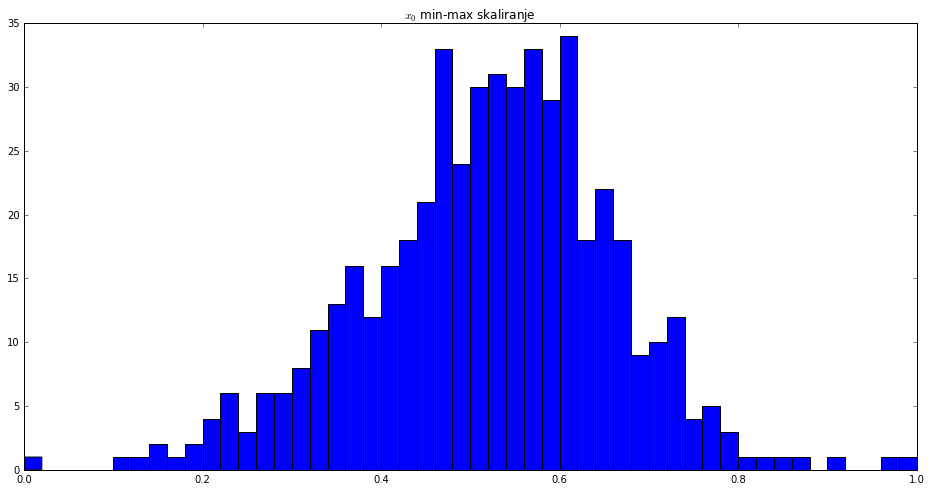

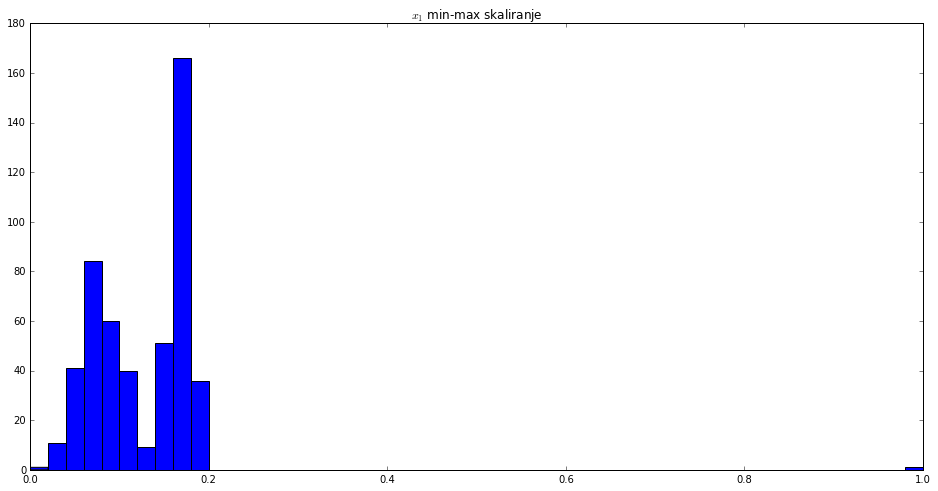

In [156]:
from sklearn.preprocessing import MinMaxScaler

# Vaš kôd ovdje...
plt.figure(figsize=(16,8))
hist(MinMaxScaler().fit_transform(X[:,0].reshape(X[:,0].shape[0],-1)),bins = 50)
plt.title('$x_0$ min-max skaliranje')
plt.show()

plt.figure(figsize=(16,8))
hist(MinMaxScaler().fit_transform(X[:,1].reshape(X[:,1].shape[0],-1)),bins=50)
plt.title('$x_1$ min-max skaliranje')
plt.show()

**Q:** Kako radi ovo skaliranje? <br>
**Q:** Dobiveni histogrami su vrlo slični. U čemu je razlika? <br>

#### (c)

Proučite razred [`preprocessing.StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Prikažite histograme vrijednosti značajki $x_0$ i $x_1$ ako su iste skalirane standardnim skaliranjem (ukupno dva histograma).

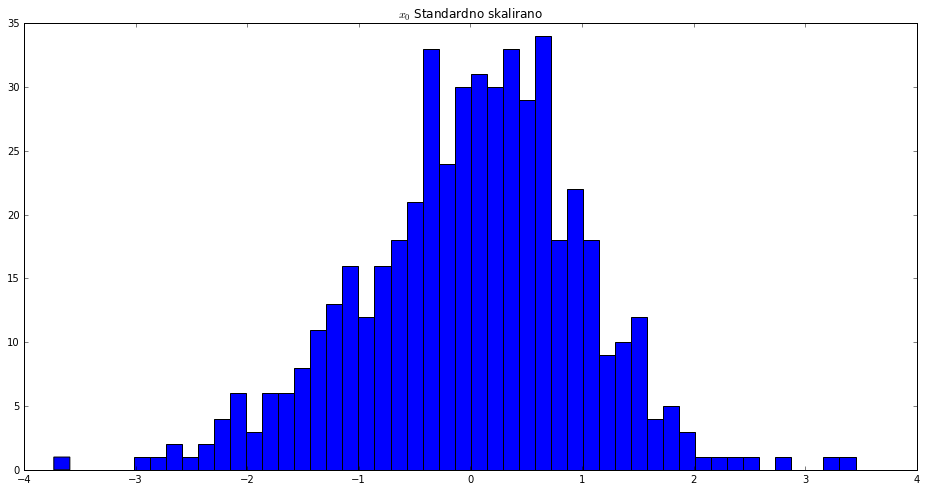

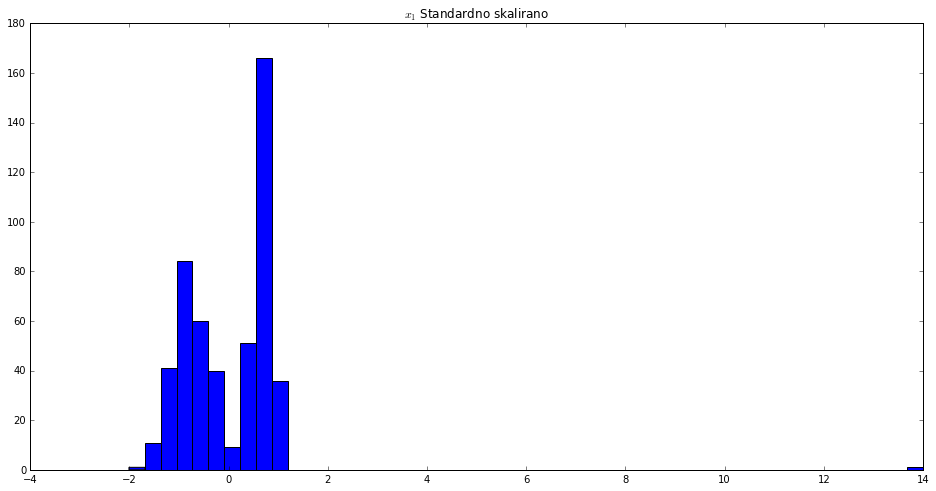

In [157]:
from sklearn.preprocessing import StandardScaler

# Vaš kôd ovdje...

plt.figure(figsize=(16,8))
hist(StandardScaler().fit_transform(X[:,0].reshape(X[:,0].shape[0],-1)),bins=50)
plt.title('$x_0$ Standardno skalirano')

plt.figure(figsize=(16,8))
hist(StandardScaler().fit_transform(X[:,1].reshape(X[:,1].shape[0],-1)),bins=50)
plt.title('$x_1$ Standardno skalirano')

**Q:** Kako radi ovo skaliranje? <br>
**Q:** Dobiveni histogrami su vrlo slični. U čemu je razlika? <br>

#### (d)

Podijelite skup primjera na skup za učenje i skup za ispitivanje u omjeru 1:1. Trenirajte SVM s jezgrenom funkcijom RBF na skupu za učenje i ispitajte točnost modela na skupu za ispitivanje, koristeći tri varijante gornjeg skupa: neskalirane značajke, standardizirane značajke i min-max skaliranje. Koristite podrazumijevane vrijednosti za $C$ i $\gamma$. Izmjerite točnost svakog od triju modela na skupu za učenje i skupu za ispitivanje. Ponovite postupak više puta (npr. 30) te uprosječite rezultate (u svakom ponavljanju generirajte podatke kao što je dano na početku ovog zadatka).

**NB:** Na skupu za učenje treba najprije izračunati parametre skaliranja te zatim primijeniti skaliranje (funkcija `fit_transform`), dok na skupu za ispitivanje treba samo primijeniti skaliranje s parametrima koji su dobiveni na skupu za učenje (funkcija `transform`).

In [225]:
# Vaš kôd ovdje...
def error_calculator(num_iter, X, y, model, err_f, err_msg, scaler=None):
    err_test = []; err_train = []
    for i in range(num_iter):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
        if scaler is not None:
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)
        model.fit(X_train, y_train)
        err_train.append(err_f(y_train, model.predict(X_train)))
        err_test.append(err_f(y_test, model.predict(X_test)))
    print err_msg 
    print 'Training set: ', average(err_train)
    print 'Test set: ', average(err_test)

model = SVC(kernel='rbf')
error_calculator(30, X, y, model, accuracy_score, '\nTocnost neskaliranog modela: ')
error_calculator(30, X, y, model, accuracy_score, '\nTocnost skaliranog modela sa Standardscale: ', StandardScaler())
error_calculator(30, X, y, model, accuracy_score, '\nTocnost skaliranog modela sa MinMaxScaler: ', MinMaxScaler())



Tocnost neskaliranog modela: 
Training set:  0.9988
Test set:  0.841466666667

Tocnost skaliranog modela sa Standardscale: 
Training set:  0.983466666667
Test set:  0.982266666667

Tocnost skaliranog modela sa MinMaxScaler: 
Training set:  0.97
Test set:  0.971866666667


**Q:** Jesu li rezultati očekivani? Obrazložite. <br>
**Q:** Bi li bilo dobro kada bismo funkciju `fit_transform` primijenili na cijelom skupu podataka? Zašto? Bi li bilo dobro kada bismo tu funkciju primijenili zasebno na skupu za učenje i zasebno na skupu za ispitivanje? Zašto?

### 5. k-najbližih susjeda

U ovom zadatku promatrat ćemo jednostavan klasifikacijski model imena **algoritam k-najbližih susjeda**. Najprije ćete ga samostalno isprogramirati kako biste se detaljno upoznali s radom ovog modela, a zatim ćete prijeći na analizu njegovih hiperparametara (koristeći ugrađeni razred, zbog efikasnosti).

#### (a)

Implementirajte klasu `KNN` koja implementira algoritam $k$ najbližih susjeda. Neobavezan parametar konstruktora jest broj susjeda `n_neighbours` ($k$), čija je podrazumijevana vrijednost 3. Definirajte metode `fit(X, y)` i `predict(X)`, koje služe za učenje modela odnosno predikciju. Kao mjeru udaljenosti koristite euklidsku udaljenost ([`scipy.linalg.norm`](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.norm.html); pripazite na parametar `axis`). Nije potrebno implementirati nikakvu težinsku funkciju.

In [158]:
from scipy.linalg import norm
from bisect import insort
from collections import Counter

class KNN:
    def __init__(self, n_neighbors=3):
        self.neighbours = n_neighbors
        
    def fit(self, X, y):
        # Vaš kôd ovdje...
        self.train_set = []
        map(self.train_set.append, zip(X,y))
        
    def predict(self, X):
        # Vaš kôd ovdje...
        y_predict = []
        for x in X:
            distances = []
            for primjer_x, primjer_y in self.train_set:
                distances.append([norm(x-primjer_x),primjer_y])
            distances = sorted(distances, key=lambda x:x)
            distances = distances[0:self.neighbours]
            prediction = np.array(distances)[:,1] #klasu uzmem
            y_predict.append(Counter(prediction).most_common()[0][0])
        return y_predict

#### (b)

Kako biste se uvjerili da je Vaša implementacija ispravna, usporedite ju s ugrađenom implementacijom u razredu [`neighbors.KNeighborsClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). Budući da spomenuti razred koristi razne optimizacijske trikove pri pronalasku najboljih susjeda, obavezno postavite parametar `algorithm=brute`, jer bi se u protivnom moglo dogoditi da Vam se predikcije razlikuju. Usporedite modele na sljedećem (umjetnom) skupu podataka:

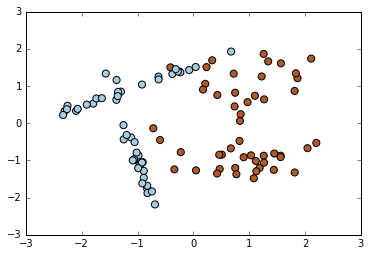

In [171]:
from sklearn.datasets import make_classification
X_art, y_art = make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=2)
mlutils.plot_2d_clf_problem(X_art, y_art)

In [172]:
from sklearn.neighbors import KNeighborsClassifier

model = KNN(n_neighbors=3)
model.fit(X_art,y_art)


knn_clf = KNeighborsClassifier(algorithm='brute',n_neighbors=3)
knn_clf.fit(X_art,y_art)
knn_clf.predict(X_art)
print 'Razlika u implementiranoj funkciji i gotovoj:', norm(model.predict(X_art) - knn_clf.predict(X_art)) 
#print '\n'.join(map(str,zip(model.predict(X_art),neigh.predict(X_art))))

Razlika u implementiranoj funkciji i gotovoj: 0.0


#### (c)

Pomoću funkcije `mlutils.plot_2d_clf_problem` iscrtajte prostor primjera i područja koja odgovaraju prvoj odnosno drugoj klasi. Eksperimentirajte s različitim vrijednostima za broj primjera $N$, broj susjeda $k$ i broj klasa $K$.

**NB:** Implementacija algoritma `KNeighborsClassifier` iz sklearna vjerojatno će raditi brže od Vaše implementacije, pa koristite nju za iscrtavanje grafa. Naime, za iscrtavanje grafa potrebno je napraviti predikciju za svaku točku u regiji iscrtavanja.

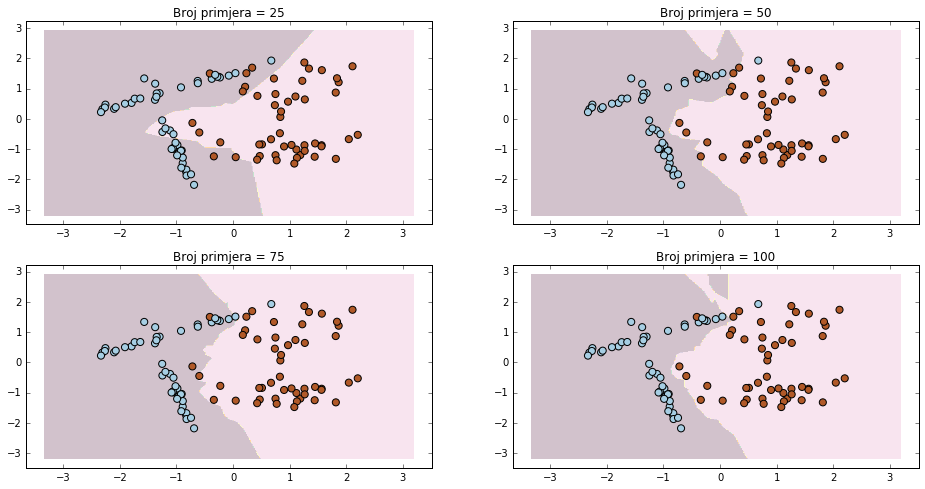

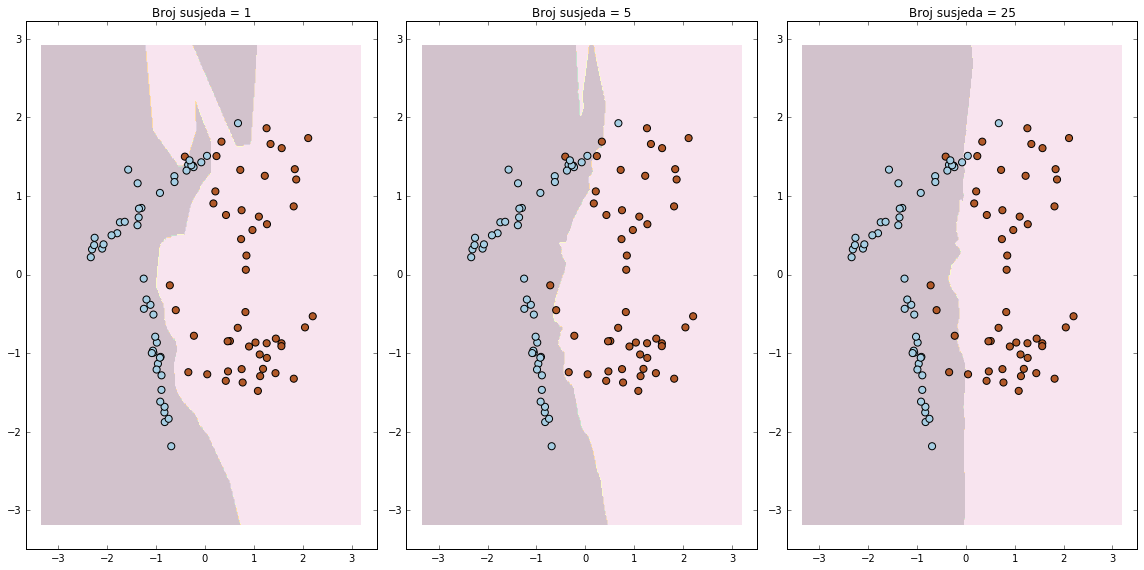

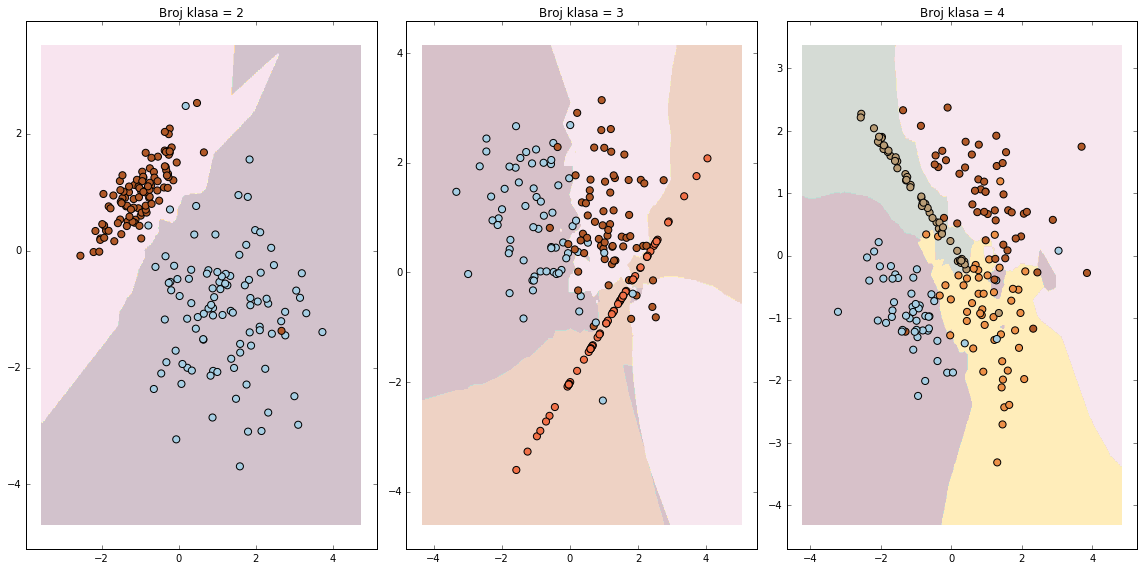

In [174]:
# Vaš kôd ovdje...
from sklearn.cross_validation import train_test_split # omogucuje uzimanje samo dijela primjera
N = len(X_art)
plt.figure(figsize=(16,8))
knn_clf = KNeighborsClassifier(n_neighbors=3)
for i,n in enumerate([N/4, N/2, 3*N/4, N]):
    # Uzeti razliciti brojevi primjera
    if float(1.*n/N) == 1:
        temp_X, temp_y = X_art, y_art
    else:
        temp_X, X_dummy, temp_y, y_dummy = train_test_split(X_art, y_art, train_size=float(1.*n/N))
    knn_clf.fit(temp_X,temp_y)
    subplot(2,2,i+1)
    mlutils.plot_2d_clf_problem(X_art,y_art,knn_clf.predict)
    plt.title('Broj primjera = %d' %n)
    
    
plt.figure(figsize=(16,8))
for i,k in enumerate([1, 5, 25]):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_art,y_art)
    subplot(1,3,i+1)
    mlutils.plot_2d_clf_problem(X_art,y_art,knn_clf.predict)
    plt.title('Broj susjeda = %d' %k)
plt.tight_layout()


plt.figure(figsize=(16,8))
knn_clf = KNeighborsClassifier(n_neighbors=3)
for i,K in enumerate([2,3,4]):
    temp_X, temp_y = make_classification(n_samples=200, n_features=2, n_redundant=0, n_repeated=0, n_clusters_per_class=1, n_classes=K)
    knn_clf.fit(temp_X, temp_y)
    subplot(1,3,i+1)
    mlutils.plot_2d_clf_problem(temp_X,temp_y,knn_clf.predict)
    plt.title('Broj klasa = %d' %K)
plt.tight_layout()

**Q:** Kako $k$ utječe na izgled granice između klasa? A broj primjera $N$?

### 6. Analiza algoritma k-najbližih susjeda

Algoritam k-nn ima hiperparametar $k$ (broj susjeda). Taj hiperparametar izravno utječe na složenost algoritma, pa je stoga izrazito važno dobro odabrati njegovu vrijednost. Kao i kod mnogih drugih algoritama, tako i kod algoritma k-nn optimalna vrijednost hiperametra $k$ ovisi o konkretnom problemu, uključivo broju primjera $N$, broju značajki (dimenzija) $n$ te broju klasa $K$.

#### (a)

Kako bismo dobili pouzdanije rezultate, potrebno je mjerenja ponoviti na različitim skupovima podataka i zatim uprosječiti dobivene vrijednosti pogrešaka. Definirajte funkciju

> `knn_eval(n_instances=100, n_features=2, n_classes=2, n_informative=2, test_size=0.3, k_range=(1, 20), n_trials=100)`

koja trenira i ispituje model k-nn na ukupno `n_instances` primjera, i to tako da za svaku vrijednost hiperparametra iz zadanog intervala `k_range` ponovi `n_trials` mjerenja, generirajući za svako od njih nov skup podataka pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) i dijeleći ga na skup za učenje i skup za ispitivanje koristeći funkciju [`sklearn.cross_validation.train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html). Udio skupa za ispitivanje definiran je parametrom `test_size`. Vrijednosti parametara `n_instances`, `n_features`, `n_classes` i `n_informative` proslijedite funkciji `make_classification` te dodatno postavite `n_redundant=0` i `n_clusters_per_class=1`. Povratne vrijednosti funkcije jest trojka `(best_k, train_errors, test_errors)`. Vrijednost `best_k` je optimalna vrijednost hiperparametra $k$ (vrijednost za koju je pogreška na skupu za ispitivanje najmanja). Vrijednosti `train_errors` i `test_errors`  liste su pogrešaka na skupu za učenja odnosno skupu za testiranje za sve razmatrane vrijednosti hiperparametra $k$.

In [2]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
def knn_eval(n_instances=100, n_features=2, n_classes=2, n_informative=2, test_size=0.3, k_range=(1, 20), n_trials=100):
    train_errors = []; test_errors = [] 
    pog_min = inf
    for k in range(k_range[0], k_range[1]+1): # za svaku vrijednost iz intervala k_range
        # radim srednju vrijednost dobivenih pogresaka
        pog_train = []; pog_test = [] 
        for inst in range(n_trials):
            X_gen, y_gen = make_classification(n_samples=n_instances, n_features=n_features, n_classes=n_classes, n_informative=n_informative, n_redundant=0, n_clusters_per_class=1)
            X_train, X_test, y_train, y_test = train_test_split(X_gen, y_gen, test_size=test_size) 
            knn_clf = KNeighborsClassifier(n_neighbors=k) 
            knn_clf.fit(X_train,y_train) 
            pog_train.append(zero_one_loss(y_train,knn_clf.predict(X_train)))
            pog_test.append(zero_one_loss(y_test,knn_clf.predict(X_test)))
        train_errors.append(average(pog_train))
        test_errors.append(average(pog_test))
        if average(pog_test) < pog_min: 
            best_k = k
            pog_min = average(pog_test)
    return (best_k, train_errors, test_errors)

#### (b)

Pomoću funkcije `knn_eval` iz (a) dijela zadatka, iscrtajte pogrešku učenja i ispitivanja kao funkcije hiperparametra $k$, $k\in\{1,\dots,20\}$, za $N=200$ primjera. Ispišite i optimalnu vrijednost za $k$.

Optimalna vrijednost za broj susjeda k = 8


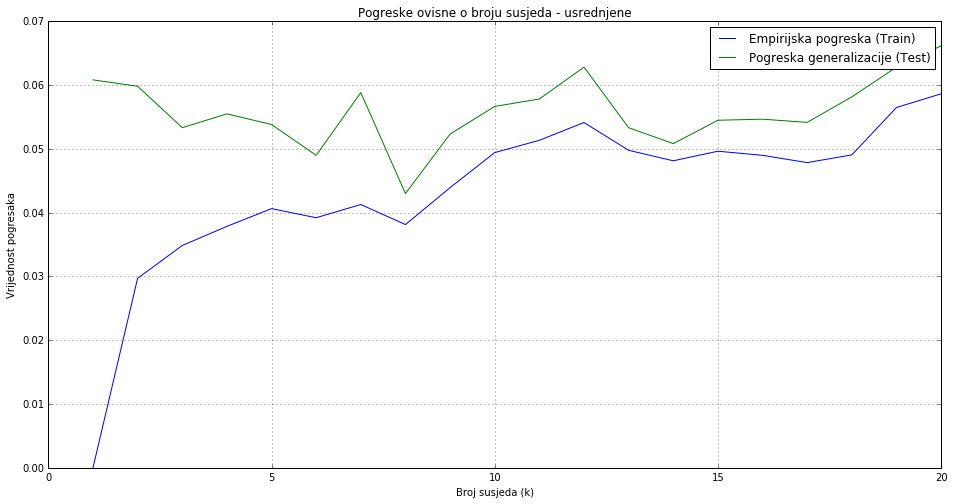

In [184]:
# Vaš kôd ovdje...
plt.figure(figsize=(16,8)) # podešavanje veličine glavnog okvira

best_k, train_errors, test_errors = knn_eval(200)

print'Optimalna vrijednost za broj susjeda k =', best_k
k_range = range(1,21)
plt.plot(np.array(k_range), train_errors, label='Empirijska pogreska (Train)')
plt.plot(np.array(k_range), test_errors, label='Pogreska generalizacije (Test)')
plt.legend()
plt.xlabel('Broj susjeda (k)')
plt.ylabel('Vrijednost pogresaka')
plt.title('Pogreske ovisne o broju susjeda - usrednjene')
plt.grid()
plt.show()


**Q:** Kojem području odgovara prenaučenost, a kojem podnaučenost modela? Zašto? <br>
**Q:** Je li uvijek moguće doseći pogrešku od 0 na skupu za učenje?

#### (c)

Pomoću funkcije `knn_eval` iz (a) dijela zadatka, iscrtajte pogreške učenja i ispitivanja kao funkcije hiperparametra $k$, $k\in\{1,\dots,20\}$, za $N=\{100, 500, 1000, 3000\}$ primjera. Načinite 4 zasebna grafikona (generirajte ih u 2x2 polju). U svakoj iteraciji ispišite optimalnu vrijednost hiperparametra $k$ (najlakše kao naslov grafikona).

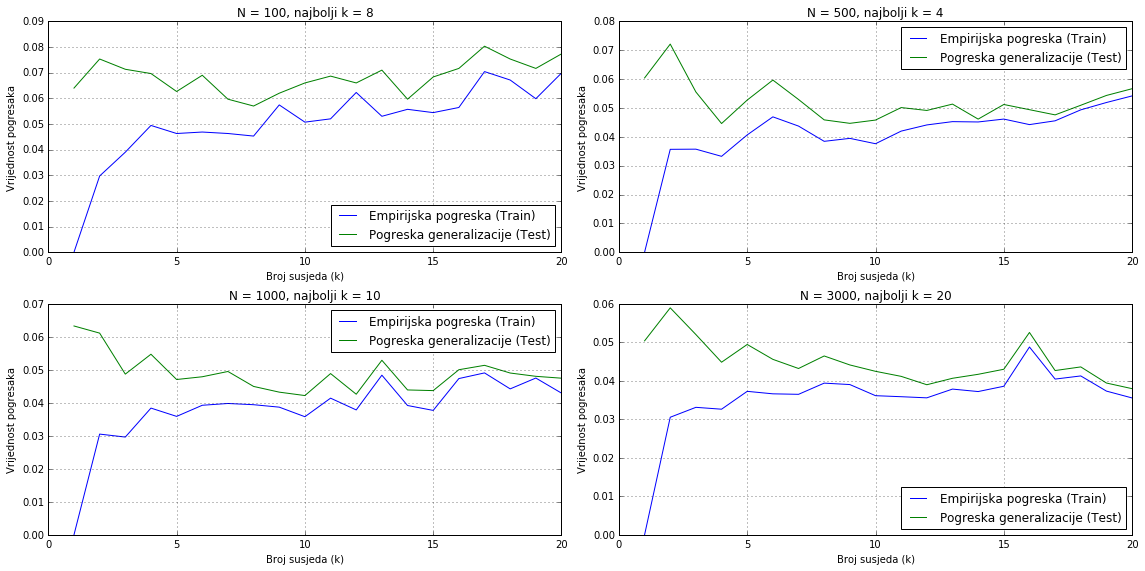

In [185]:
# Vaš kôd ovdje...
plt.figure(figsize=(16,8)) # podešavanje veličine glavnog okvira

for i,N in enumerate([100, 500, 1000, 3000]):
    best_k, train_errors, test_errors = knn_eval(N)
    subplot(2,2,i+1)
    k_range = range(1,21)
    plt.plot(np.array(k_range), train_errors, label='Empirijska pogreska (Train)')
    plt.plot(np.array(k_range), test_errors, label='Pogreska generalizacije (Test)')
    plt.legend(loc='best')
    plt.xlabel('Broj susjeda (k)')
    plt.ylabel('Vrijednost pogresaka')
    plt.title('N = %d, najbolji k = %d' %(N, best_k))
    plt.grid()
plt.tight_layout()

### 7. Nerobusnost algoritma k-nn

Svrha ovog zadatka jest analizirati u kojoj je mjeri algoritam k-nn osjetljiv na razlike u mjernoj skali između pojedinih dimenzija te na prisutnost nebitnih značajki.

#### (a)

Krenite od umjetnog skupa podataka danog u nastavku. Zatim napravite kopiju tog skupa podataka (pogledajte [`copy.deepcopy`](https://docs.python.org/2/library/copy.html#copy.deepcopy)) i preinačite ju tako da jednu dimenziju pomnožite sa 100. Oba skupa podijelite na skup za učenje i skup za ispitivanje u omjeru 7:3, pri čemu obratite pozornost na to da oba skupa podijelite na identičan način. Trenirajte modele k-nn na skaliranoj i neskaliranoj inačici skupa za učenje (s pretpostavljenim parametrima), a zatim ispitajte model na odgovarajućim ispitnim inačicama skupova.

In [209]:
from copy import deepcopy
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=2)
# Vaš kôd ovdje...
X_skal = deepcopy(X)
X_skal[:,0] = X_skal[:,0] * 100
X_skal[:,1] = X_skal[:,1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)
X_skal_train, X_skal_test, y_train, y_test = train_test_split(X_skal, y, test_size=0.7, random_state=42)

In [212]:
knn_clf = KNeighborsClassifier(n_neighbors=5) 
knn_clf.fit(X_train,y_train) 
print 'Pogreska dobivena bez skaliranja: ', 1 - knn_clf.score(X_test, y_test) 

knn_clf = KNeighborsClassifier(n_neighbors=5) 
knn_clf.fit(X_skal_train,y_train) 
print 'Pogreska dobivena sa skaliranjem: ',1 - knn_clf.score(X_skal_test, y_test)

Pogreska dobivena bez skaliranja:  0.0714285714286
Pogreska dobivena sa skaliranjem:  0.55


**Q:** Zašto je ovaj problem tako izražen kod algoritma k-nn?

#### (b)

Kako bismo provjerili u kojoj je mjeri algoritam k-nn osjetljiv na prisustvo nebitnih značajki, možemo iskoristiti funkciju `make_classification` kako bismo generirali skup primjera kojemu su neke od značajki nebitne. Naime, parametar `n_informative` određuje broj bitnih značajki, dok parametar `n_features` određuje ukupan broj značajki. Ako je `n_features > n_informative`, onda će neke od značajki biti nebitne. Umjesto da izravno upotrijebimo funkciju `make_classification`, upotrijebit ćemo funkciju `knn_eval` iz zadatka (7a), jer ćemo na taj način dobiti pouzdanije procjene.

Koristite funkciju `knn_eval` na dva načina. U oba koristite $N=1000$ primjera, $n=10$ značajki i $K=5$ klasa, ali za prvi neka su svih 10 značajki bitne, a za drugi neka je bitno samo 5 od 10 značajki. Ispišite pogreške učenja i ispitivanja za oba modela za optimalnu vrijednost $k$ (vrijednost za koju je ispitna pogreška najmanja).

In [24]:
# Vaš kôd ovdje...
from sklearn.neighbors import KNeighborsClassifier


best_k, train_errors, test_errors = knn_eval(1000, n_features=10, n_classes=5, n_informative=10, test_size=0.3, k_range=(1, 20), n_trials=100)
print 'Primjeri sa svih 10 bitnih znacajki'
print 'Optimalan k = %s' % (best_k)
print 'Pogreska ucenja: ', train_errors[best_k-1] 
print 'Pogreska ispitivanja: ', test_errors[best_k-1] 
print

best_k, train_errors, test_errors = knn_eval(1000, n_features=10, n_classes=5, n_informative=5, test_size=0.3, k_range=(1, 20), n_trials=100)
print 'Primjeri sa 5 od 10 bitnih znacajki'
print 'Optimalan k = %s' % (best_k)
print 'Pogreska ucenja: ', train_errors[best_k-1] 
print 'Pogreska ispitivanja: ', test_errors[best_k-1] 

Primjeri sa svih 10 bitnih znacajki
Optimalan k = 7
Pogreska ucenja:  0.0844
Pogreska ispitivanja:  0.126633333333

Primjeri sa 5 od 10 bitnih znacajki
Optimalan k = 11
Pogreska ucenja:  0.160028571429
Pogreska ispitivanja:  0.204966666667


[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900]


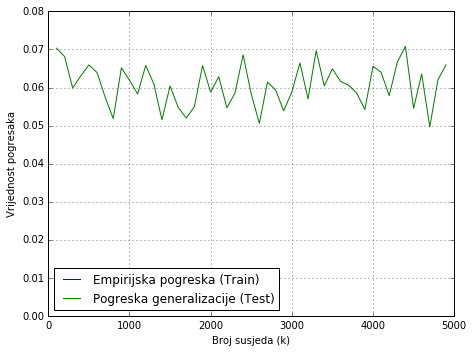

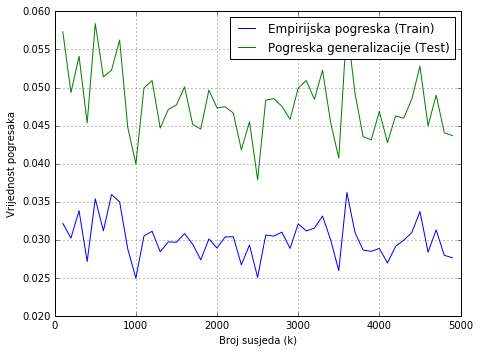

In [19]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, zero_one_loss
def knn_eval(n_instances=100, n_features=2, n_classes=2, n_informative=2, test_size=0.3, k_range=(1, 20), n_trials=100):
    train_errors = []; test_errors = [] 
    pog_min = inf
    for k in range(k_range[0], k_range[1]+1): # za svaku vrijednost iz intervala k_range
        # radim srednju vrijednost dobivenih pogresaka
        pog_train = []; pog_test = [] 
        for inst in range(n_trials):
            X_gen, y_gen = make_classification(n_samples=n_instances, n_features=n_features, n_classes=n_classes, n_informative=n_informative, n_redundant=0, n_clusters_per_class=1)
            X_train, X_test, y_train, y_test = train_test_split(X_gen, y_gen, test_size=test_size) 
            knn_clf = KNeighborsClassifier(n_neighbors=k) 
            knn_clf.fit(X_train,y_train) 
            pog_train.append(zero_one_loss(y_train,knn_clf.predict(X_train)))
            pog_test.append(zero_one_loss(y_test,knn_clf.predict(X_test)))
        train_errors.append(average(pog_train))
        test_errors.append(average(pog_test))
        if average(pog_test) < pog_min: 
            best_k = k
            pog_min = average(pog_test)
    return (best_k, train_errors, test_errors)

N_range = range(100,5000,100)
for i,k in enumerate([1,3]):
    train_error = []
    test_error = []
    for instances in N_range:
        best_k, train_errors, test_errors = knn_eval(instances, k_range=(k,k))
        train_error += train_errors
        test_error += test_errors
    plt.figure(figsize=(16,12))
    subplot(2,2,i+1)
    plt.plot(N_range, train_error, label='Empirijska pogreska (Train)')
    plt.plot(N_range, test_error, label='Pogreska generalizacije (Test)')
    plt.legend(loc='best')
    plt.xlabel('Broj susjeda (k)')
    plt.ylabel('Vrijednost pogresaka')
    plt.grid()

**Q:** Zašto nebitne značajke ovoliko utječu na perfomanse modela?